# Gradient Descent for Linear Regresion


In [1]:
import math, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# random data about houses
x_train = np.array([1.0, 2.0, 3.0, 3.5, 4.0, 6.5, 8.0])
y_train = np.array([300.0, 500.0, 730.0, 800.0, 950.0, 1300, 1900])

In [3]:
# Cost function

def cost_function(x, y, w, b):
    m = x.shape[0]
    cost_sum = 0

    for i in range(m):
        f_wb =  w * x[i] + b
        cost_sum = cost_sum + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost_sum

    return total_cost


<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [4]:
def gradient_funtion(x, y, w, b):

    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i] # simultaneous
        dj_db_i = (f_wb - y[i]) # simultaneous
        # now i can define partial derivative
        dj_dw += dj_dw_i #sumation
        dj_db += dj_db_i #sumation

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [5]:
def gradient_descent(x, y, w_initial, b_initial, alpha, num_iters, cost_function, gradient_function):

    J_history = []
    p_history = []
    w = w_initial
    b = b_initial

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w,b])

        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_history, p_history

In [6]:
# initialize parameters
w_initial = 0
b_initial = 0
# some gradient descent settings
num_iters = 1000
tmp_alpha = 1.0e-2

w_final, b_final, J_history, p_history = gradient_descent(x_train, y_train, w_initial, b_initial, tmp_alpha, num_iters, cost_function, gradient_funtion)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.37e+05  dj_dw: -4.820e+03, dj_db: -9.257e+02   w:  4.820e+01, b: 9.25714e+00
Iteration  100: Cost 3.01e+03  dj_dw:  9.596e-01, dj_db: -5.032e+00   w:  2.183e+02, b: 4.75688e+01
Iteration  200: Cost 2.99e+03  dj_dw:  7.567e-01, dj_db: -3.968e+00   w:  2.174e+02, b: 5.20426e+01
Iteration  300: Cost 2.98e+03  dj_dw:  5.967e-01, dj_db: -3.129e+00   w:  2.168e+02, b: 5.55705e+01
Iteration  400: Cost 2.97e+03  dj_dw:  4.705e-01, dj_db: -2.468e+00   w:  2.162e+02, b: 5.83525e+01
Iteration  500: Cost 2.96e+03  dj_dw:  3.710e-01, dj_db: -1.946e+00   w:  2.158e+02, b: 6.05462e+01
Iteration  600: Cost 2.96e+03  dj_dw:  2.926e-01, dj_db: -1.534e+00   w:  2.155e+02, b: 6.22762e+01
Iteration  700: Cost 2.96e+03  dj_dw:  2.307e-01, dj_db: -1.210e+00   w:  2.152e+02, b: 6.36403e+01
Iteration  800: Cost 2.96e+03  dj_dw:  1.819e-01, dj_db: -9.541e-01   w:  2.150e+02, b: 6.47160e+01
Iteration  900: Cost 2.96e+03  dj_dw:  1.435e-01, dj_db: -7.524e-01   w:  2.148e+02, b: 6.55643e+01


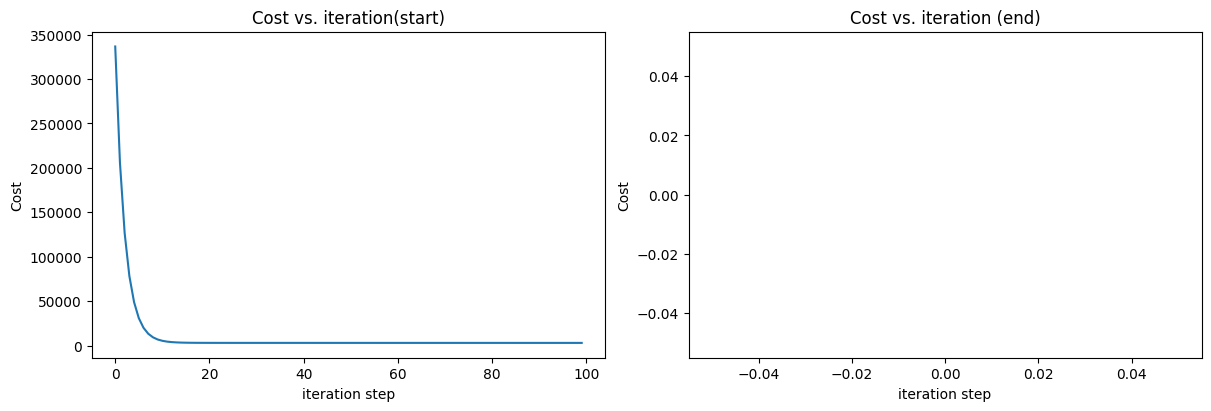

In [7]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [8]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 281.0 Thousand dollars
1200 sqft house prediction 323.9 Thousand dollars
2000 sqft house prediction 495.7 Thousand dollars
